In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import string
#Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF,LatentDirichletAllocation;
from sklearn.preprocessing import normalize;


import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
master = pd.read_pickle("master_senate")
master_text = master[['basePrintNoStr','full_text']]

In [3]:
master.shape

(137701, 212)

In [4]:
master.sample()

,_id,activeVersion,adopted,approvalMessage,basePrintNo,basePrintNoStr,printNo,publishedDateTime,session_x,signed,...,other_floor_votes,full_text,num_cosponsors,replacedBy,num_amendments,previousVersion,sponsor_chamber,sponsor_district,sponsor_fullName,sponsor_shortName
57956,5b1c15955a67a40cd348a2e9,,True,None,J5493,J5493-2011,J5493,2012-06-15T17:43:01,2011,False,...,NaN,\nLEGISLATIVE RESOLUTION honoring Alida Falk...,0,not_replaced,1,no_previousVersion,SENATE,42.0,John J. Bonacic,BONACIC


In [5]:
documents = master_text.full_text.values.tolist()

In [6]:
documents = [re.sub("\[|\]", " ", text) for text in documents]
print("*")
documents = [re.sub("\\b[a-z]{1,2}\\b","", text) for text in documents]
print("**")
documents = [re.sub("\d+","", text) for text in documents]
print("***")
documents = [text.lower() for text in documents]
print("***")
#Remove Punctuation
to_remove = string.punctuation
table = str.maketrans("", "", to_remove)

documents = [text.translate(table)\
                             for text in documents]
print("****")

*
**
***
***
****


In [9]:
#Stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['new','york','state' \
                   'law', 'bill', 'proposed'\
                   , 'committee','whereas','senate','assembly','shall'
                  ,'law', 'act', 'read', 'follows','printed','section','introduced','relation'
                   'amend', 'follows', 'section','mr','mrs','wedding','amending'])

In [10]:
documents[1]

'\n                    s t a t e   o f   n e w   y o r k\n\n\n                                   \n\n                        regular sessions\n\n                            i n  s e n a t e\n\n                               prefiled\n\n                             january  \n                               \n\nintroduced    sen  kruger  read twice and ordered printed and when\n  printed   committed  the committee  codes\n\nan act  amend the penal law  relation  increasing the penalty for\n  witness and jury tampering\n\n  the people of the state of new york represented in senate and  assem\nbly do enact as follows\n\n  section  the closing paragraph  section   the penal law \namended  read  follows\n  bribing  witness   class  d  c felony\n  s    the  closing  paragraph    section   the penal law \namended  read  follows\n  bribe receiving   witness   class  d  c felony\n  s  the closing paragraph  section     the  penal  law  \namended    chapter      the  laws     amended  read \nfoll

In [15]:
tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2),max_df=0.70)
text_tfidf = tfidf.fit_transform(documents)

In [16]:
# lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tfidf.fit(text_tfidf)

In [17]:
nmf_model = NMF(n_components=40,verbose=1,random_state=29)
nmf_model.fit(text_tfidf)
print("model fit")
dtm_nmf = nmf_model.transform(text_tfidf)
print("model transformed")

violation: 1.0
violation: 0.2814184357728514
violation: 0.16582952473800505
violation: 0.10867306555988632
violation: 0.07556185757399865
violation: 0.05521691801160743
violation: 0.04551049224899968
violation: 0.04038752157915627
violation: 0.035132151558713694
violation: 0.028435699514729244
violation: 0.02289367399301274
violation: 0.018957687266515273
violation: 0.016082401224164114
violation: 0.013891409834192125
violation: 0.01206935279394818
violation: 0.010451587085287904
violation: 0.008970079289228683
violation: 0.007525367960662688
violation: 0.006278144496401112
violation: 0.005230318639758462
violation: 0.004375231245197984
violation: 0.003688675835436046
violation: 0.003144508285827668
violation: 0.0027212925135077885
violation: 0.002399060769124317
violation: 0.002162218691601184
violation: 0.002002217092259607
violation: 0.0019082698189047795
violation: 0.001868244202057899
violation: 0.0018672926168664477
violation: 0.0018908908309303596
violation: 0.001907502934761892

In [18]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print_top_words(nmf_model,tfidf.get_feature_names(),10)

Topic #0: utility impending corporations rules regulations electrical utility utility corporations electrical regulations rules emergency
Topic #1: business employee person article corporation agency violation employer general contract
Topic #2: eagle eagle scout scout scouting rank eagle rank america boy scouts boy scouts
Topic #3: legislative legislative body body occasion upon occasion community honor upon resolved occasion designation
Topic #4: property real real property tax property tax exemption amend real taxation assessment subdivision real
Topic #5: court criminal defendant order criminal procedure procedure police subdivision officer person
Topic #6: school district school district education districts board school districts school year city schools
Topic #7: tax credit taxable taxpayer subsection taxable year year amount allowed income
Topic #8: health care health care public health services patient medical public mental provider
Topic #9: notextavailable educational educati

In [19]:
def dict_topic_words(model, feature_names, n_top_words):
    topic_dict={}
    for topic_idx, topic in enumerate(model.components_):
#         message = "Topic #%d: " % topic_idx
        message = ""
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
#         print(message)
        topic_dict[topic_idx]=message
#     print()
    return topic_dict


dict_topic_words(nmf_model,tfidf.get_feature_names(),5)

{0: 'utility impending corporations rules regulations electrical utility',
 1: 'business employee person article corporation',
 2: 'eagle eagle scout scout scouting rank eagle',
 3: 'legislative legislative body body occasion upon occasion',
 4: 'property real real property tax property tax',
 5: 'court criminal defendant order criminal procedure',
 6: 'school district school district education districts',
 7: 'tax credit taxable taxpayer subsection',
 8: 'health care health care public health services',
 9: 'notextavailable educational educational leadership breakfast awards breakfast',
 10: 'retirement retirement system system actuarial state local',
 11: 'fire firefighter volunteer fire department firefighters',
 12: 'county one percent percent rate tax',
 13: 'girl gold award gold scout gold girl scout',
 14: 'girl scouting silver award girl scout girl scouting',
 15: 'election elections board elections board voter',
 16: 'team coach high school athletic high',
 17: 'degree degree 

In [20]:
# now let's transform our documents to topic-space
print(f"shape before transforming to topic space: {text_tfidf.shape}")

# doc_topics = lda.transform(counts)

print(f"shape after transforming to topic space: {dtm_nmf.shape}") #838 lines, 20 topics

shape before transforming to topic space: (137701, 4060723)
shape after transforming to topic space: (137701, 40)


In [21]:
type(dtm_nmf)
doc_max_top = np.argmax(dtm_nmf, axis=1 )
doc_max_top.shape


(137701,)

In [36]:
basePrintNoStr = list(master['basePrintNoStr'])
doc_topics = pd.DataFrame(dtm_nmf)
doc_topics.index = basePrintNoStr
doc_topics.head()
# doc_topics.sort_values(by=11,ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
A11590-2007,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.234269,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
S208-2009,0.0,0.000695,0.0,0.0,0.000000,0.008068,0.000683,0.000000,0.000000,0.000000,...,0.000000,0.038553,0.000000,0.000000,0.0,0.0,0.000508,0.000000,0.000000,0.000000
S108-2009,0.0,0.005007,0.0,0.0,0.000000,0.000613,0.000000,0.004155,0.000000,0.000000,...,0.000154,0.001808,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.002007,0.011689
S110-2009,0.0,0.002480,0.0,0.0,0.000423,0.014004,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003167,0.000000,0.000593,0.0,0.0,0.000529,0.000247,0.000000,0.000000
S111-2009,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000866,0.043588,0.000000,...,0.000421,0.004183,0.001152,0.000000,0.0,0.0,0.000000,0.000019,0.000000,0.000000


In [37]:
doc_topics['max_topic'] = doc_max_top
doc_topics.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,max_topic
A11590-2007,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.234269,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9
S208-2009,0.0,0.000695,0.0,0.0,0.000000,0.008068,0.000683,0.000000,0.000000,0.000000,...,0.038553,0.000000,0.000000,0.0,0.0,0.000508,0.000000,0.000000,0.000000,17
S108-2009,0.0,0.005007,0.0,0.0,0.000000,0.000613,0.000000,0.004155,0.000000,0.000000,...,0.001808,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.002007,0.011689,22
S110-2009,0.0,0.002480,0.0,0.0,0.000423,0.014004,0.000000,0.000000,0.000000,0.000000,...,0.003167,0.000000,0.000593,0.0,0.0,0.000529,0.000247,0.000000,0.000000,5
S111-2009,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000866,0.043588,0.000000,...,0.004183,0.001152,0.000000,0.0,0.0,0.000000,0.000019,0.000000,0.000000,8


In [24]:
### t-SNE:
from sklearn.manifold import TSNE
import sklearn.cluster as cluster
import seaborn as sns

# tsne = TSNE(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0,metric='cosine')
#Project the data in 2D

tsne


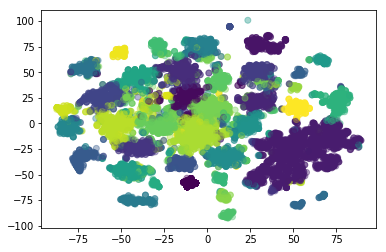

In [25]:
doc_plot = tsne.fit_transform(doc_topics[::10])
print("tsne")
plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_top[::10], alpha=.4)
plt.savefig("tsne_senate")

In [26]:
#SAVE DOC_MAX_PD(BELOW)for ease of data cleaning

In [27]:
doc_max_pd = pd.Series(doc_max_top)
doc_max_pd.value_counts()

3     23166
34     8389
31     7759
35     6435
8      5459
30     4717
23     4490
5      4351
4      4164
6      4136
19     4122
0      4110
1      3931
22     3895
25     3698
7      3282
2      3254
20     3057
17     3024
11     2998
15     2677
18     2606
16     2590
10     2551
29     2515
39     2372
27     1894
28     1432
12     1371
21     1300
26     1151
38     1145
32     1140
36     1037
33      843
13      718
24      715
37      456
14      419
9       332
dtype: int64

In [28]:
print_top_words(nmf_model,tfidf.get_feature_names(),20)

Topic #0: utility impending corporations rules regulations electrical utility utility corporations electrical regulations rules emergency impending emergencies tion impending impending utility enact mandatory rations notify emergency affected mandatory electrical request publica emergencies elec address magnitude
Topic #1: business employee person article corporation agency violation employer general contract subdivision information may hundred public labor civil action notice dollars
Topic #2: eagle eagle scout scout scouting rank eagle rank america boy scouts boy scouts distinguished rank glory nation scouts america diligence achieved achievement prestigious highest youth
Topic #3: legislative legislative body body occasion upon occasion community honor upon resolved occasion designation designation resolution award life th sense sense legislative commend designation recipient recipient
Topic #4: property real real property tax property tax exemption amend real taxation assessment su

Topic #37: closed settlement agreement charitable settlement closed confidentiality charitable organization agreements agreements closed using charitable donations confidentiality agreement closed confidentiality agreements confidentiality agreement settlement agreement agree ments registered state using donations organization
Topic #38: constitution article constitution resolved concur concur election article amendment general election legislature constitution amended concurrent resolution session convening resolution proposing constitution published concur foregoing succeeding general referred first months previous regular legislative convening next
Topic #39: animal animals agriculture markets dog agriculture markets cruelty pet food companion person companion animal cruelty animals dogs amend agriculture markets amended markets relation agriculture amend farm humane



In [38]:
pd.to_pickle(doc_topics,"doc_topics_v2")

In [39]:
doc_topics

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,max_topic
A11590-2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.342694e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
S208-2009,0.000000,0.000695,0.000000,0.000000,0.000000,0.008068,0.000683,0.000000,0.000000,0.000000e+00,...,0.038553,0.000000,0.000000,0.000000,0.000000,0.000508,0.000000,0.000000,0.000000,17
S108-2009,0.000000,0.005007,0.000000,0.000000,0.000000,0.000613,0.000000,0.004155,0.000000,0.000000e+00,...,0.001808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002007,0.011689,22
S110-2009,0.000000,0.002480,0.000000,0.000000,0.000423,0.014004,0.000000,0.000000,0.000000,0.000000e+00,...,0.003167,0.000000,0.000593,0.000000,0.000000,0.000529,0.000247,0.000000,0.000000,5
S111-2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000866,0.043588,0.000000e+00,...,0.004183,0.001152,0.000000,0.000000,0.000000,0.000000,0.000019,0.000000,0.000000,8
S112-2009,0.000000,0.001292,0.000000,0.000000,0.000000,0.000000,0.012886,0.000000,0.017113,0.000000e+00,...,0.007824,0.000000,0.001318,0.000000,0.002325,0.003566,0.001307,0.000000,0.000000,17
S116-2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
S117-2009,0.000000,0.007777,0.000000,0.000000,0.000000,0.000000,0.000000,0.003737,0.000000,0.000000e+00,...,0.001666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011257,22
S123-2009,0.000000,0.000452,0.000123,0.000234,0.000025,0.000154,0.001141,0.000599,0.014026,0.000000e+00,...,0.003991,0.000000,0.000000,0.005734,0.030290,0.000119,0.000000,0.000000,0.000133,35
S124-2009,0.000000,0.004043,0.000000,0.000000,0.011014,0.006237,0.000000,0.000851,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002831,17
